# MID EXAM Machine Learning

Gabriela Nathania H.<br>
2201797494<br>
LA01<br>

# Load Data

In [ ]:
import pandas as pd
data = pd.read_csv("datasetMidExamCOMP6577.csv")

In [ ]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,-1.642373,-1.891163,1.255130,0.704814,0.356427,-0.041620,1.041863,0.380663,2.426233,-1.235526,-2.257606,0.129417,0.752667,1.022619,-0.362493,-1.229912,0.192965,-0.647965,0.856564,0.109518,-31.739298
1,-0.236370,0.403301,0.226318,0.840127,0.913563,0.674385,-0.321146,-0.334045,-0.826258,0.109989,1.074009,-0.453897,-1.014470,-0.145812,0.347691,0.534088,-0.381251,0.409131,0.774001,0.207668,26.899336
2,0.583380,-0.108189,-1.625678,0.755708,0.585915,1.802448,-1.214784,0.560887,0.689383,-0.534512,0.359603,-0.695661,-0.989813,-0.581622,-0.496429,0.605437,-1.127485,1.480744,1.251860,0.523639,183.024854
3,-0.806393,0.478986,-0.233436,0.262014,1.020527,1.707140,-0.048339,1.484586,0.887573,0.791469,0.254291,1.448427,-0.186886,0.472222,1.297318,0.040038,0.989484,-0.321475,-0.538455,-0.962383,396.679552
4,1.298593,1.326947,0.580294,1.225229,-1.301900,-0.253788,0.700775,1.294974,-0.019954,0.030802,1.735332,-0.802592,1.317312,-0.039003,1.928265,1.166949,-1.206211,-0.157603,1.174179,0.501171,387.164191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.763517,1.409303,-0.847103,-1.309791,0.701538,-1.047753,-1.120423,-1.108063,0.843118,-1.324085,1.255142,-0.901189,-0.455522,0.162444,-2.337168,-0.687933,1.572166,-0.577930,-0.847717,-0.487834,-486.366102
4996,-0.753434,0.305572,-0.388070,1.933120,1.629975,-0.846548,0.050100,0.409460,-1.586984,-0.123365,-2.763681,1.210202,0.435909,-1.076241,1.060913,0.188963,0.173448,-0.030442,-0.588082,0.293669,-78.667215
4997,0.705710,-0.201628,-0.974727,-1.043164,1.196562,-0.011345,-0.733875,1.287912,-1.319149,1.132581,-0.581551,-0.051830,-0.342204,0.289448,-0.792051,-0.301194,-0.857729,-0.277780,-0.049976,0.438051,122.827208
4998,-0.146282,-1.576102,0.614686,0.786695,0.896506,0.231904,-0.100321,0.152559,-0.157891,0.262598,1.496705,1.164698,1.521198,-1.678416,-0.171298,1.799270,0.090973,1.143055,2.484836,-0.418207,115.310630


All data do not have any null value

In [ ]:
data.any().isna()

X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
Y      False
dtype: bool

In [ ]:
data.shape

(5000, 21)

All data are float

In [ ]:
data.dtypes

X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
Y      float64
dtype: object

# Simple Exploratory Data Analysis (EDA)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,5000.0,-0.001953,0.987112,-3.488324,-0.686743,0.001733,0.648212,3.318885
X2,5000.0,-0.015267,0.991450,-3.496688,-0.686823,-0.013995,0.649049,3.839527
X3,5000.0,0.022455,1.007237,-5.148485,-0.637566,0.013355,0.693568,3.735288
X4,5000.0,0.008668,0.998172,-3.573875,-0.687059,-0.005516,0.685630,3.803317
X5,5000.0,0.035632,1.005234,-3.224547,-0.658617,0.043228,0.705309,3.425089
X6,5000.0,0.013229,1.002731,-3.536761,-0.657587,0.030935,0.695355,3.467728
X7,5000.0,-0.000042,0.992107,-3.698173,-0.676569,0.007159,0.662130,3.657381
X8,5000.0,0.004030,1.000990,-3.671536,-0.662038,0.009486,0.668084,3.506429
X9,5000.0,-0.002143,0.989346,-3.677741,-0.673238,-0.004556,0.681150,3.645761
X10,5000.0,-0.004591,0.978357,-3.650546,-0.656132,-0.007645,0.641820,3.185439


Plot for every pair of features

In [ ]:
import seaborn as sns
sns.pairplot(data, size = 4)

Data correlation
![correlation](https://drive.google.com/uc?id=1xJ9A9xgSIVluj5gll4b6bPweRePzRRNu)

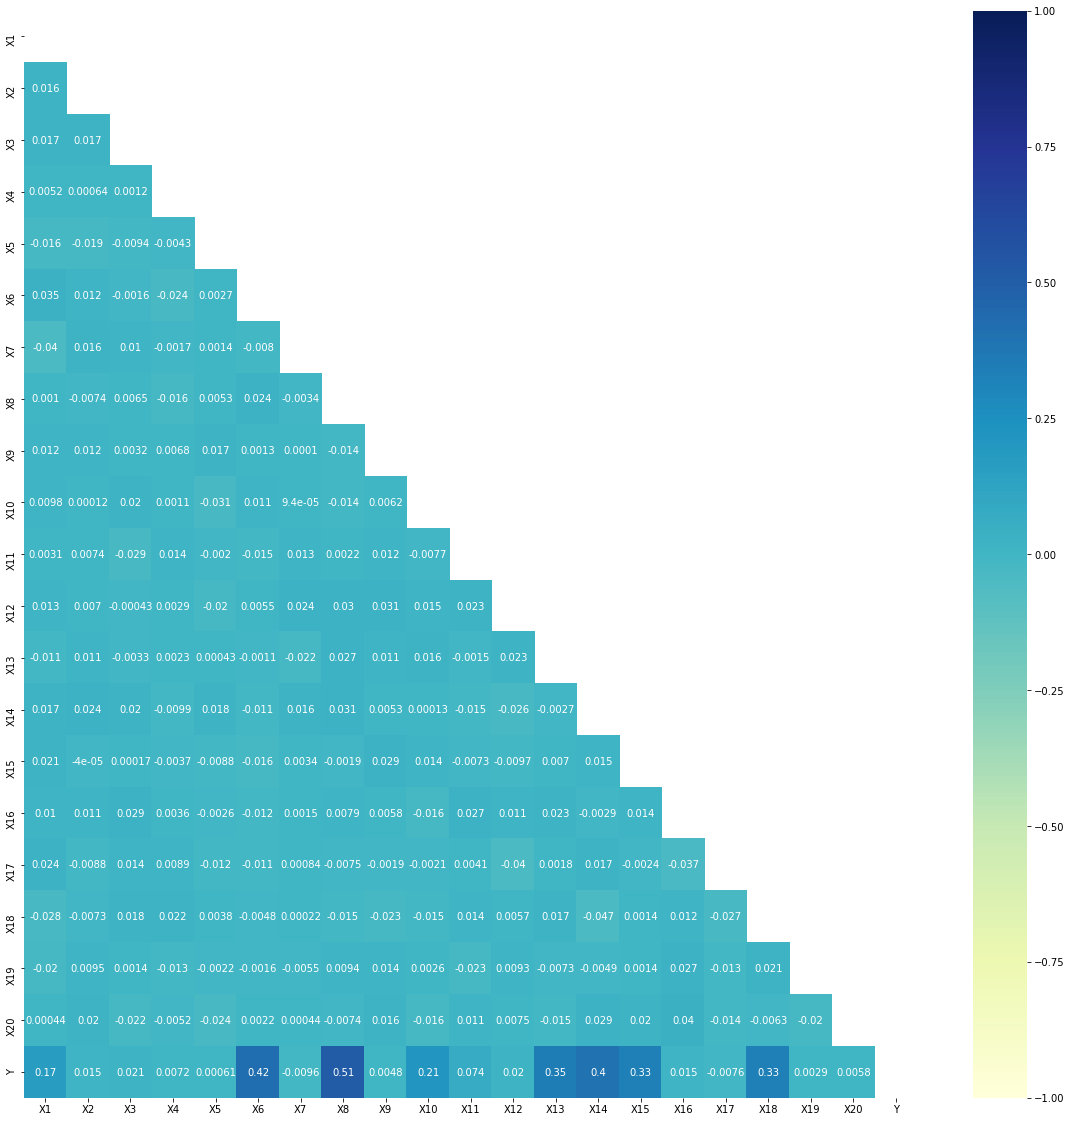

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
matrix = np.triu(data.corr())
plt.figure(figsize=(20, 20)) 
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, mask=matrix,cmap='YlGnBu')

* X8 has the highest correlation value to Y 
* There are 8 features which have correlation values > 0.1 to Y
* Every pair of features do not have any significant correlation value

Value distribution of X1 to X20 follow the same pattern of Normal Distribution, so there's no need to do normalization.

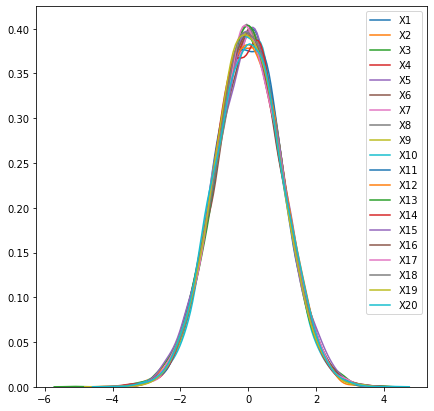

In [ ]:
plt.figure(figsize=(7, 7))
for i in data.columns:
  if i == "Y" : break
  sns.kdeplot(data[i])

# Choosing Learning Algorithm

![ML Map](https://drive.google.com/uc?id=1Jqp34aw-e3_uK3XN8LmzQ9vRYk1AG6U7)

Considering:
* More than 50 sample of Data
* Predicting continues values

Thus, **Regression** model can be selected.

# Features and Target

In [ ]:
features = ["X1",   "X2",   "X3",   "X4",   "X5",
            "X6",   "X7",   "X8",   "X9",   "X10",
            "X11",  "X12",  "X13",  "X14",  "X15",
            "X16",  "X17",  "X18",  "X19",  "X20"]
target = ["Y"]

# Features Selection

## Filter Method
* Based on EDA which has been done before
* Choosing feature with correlation value >= 0.5 to Y

In [ ]:
corr = data.corr()
target_corr = abs(corr["Y"])

choosen_feature = target_corr[target_corr > 0.5]
print(choosen_feature)

selected_features_filter = ["X8"]

X8    0.508951
Y     1.000000
Name: Y, dtype: float64


One feature choosen by this method

In [ ]:
selected_features_filter

['X8']

## Recursive Feature Elimination

* Recursively removing attributes and building a model on those attributes that remain
* Uses accuracy metric to rank the feature according to their importance

Find the optimum number of features with the highest accuracy metric score (R^2) using Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

model = LinearRegression()

maxi = 0
n_features = 0

for n in range(1,20):
  rfe = RFE(model, n)
  x_train, x_test, y_train, y_test = train_test_split(data[features],data[target],test_size = 0.2, random_state= 0)
  x_train_rfe = rfe.fit_transform(x_train,np.ravel(y_train))
  x_test_rfe = rfe.transform(x_test)
  model.fit(x_train_rfe, y_train)
  score = model.score(x_test_rfe, y_test)
  if score > maxi:
    maxi = score
    n_features = n
    tmp = rfe.support_

print("Optimum number of features: ", n_features)
print("with R2 score: ", maxi)

selected_features_rfe = []

for id,i in enumerate(tmp):
  if i == True:
    print("X%2d  : selected" % (id+1))
    selected_features_rfe.append("X"+str(id+1))
  else:
    print("X%2d  : not selected" % (id+1))

Optimum number of features:  10
with R2 score:  0.9999940737815886
X 1  : selected
X 2  : not selected
X 3  : not selected
X 4  : selected
X 5  : not selected
X 6  : selected
X 7  : not selected
X 8  : selected
X 9  : not selected
X10  : selected
X11  : selected
X12  : not selected
X13  : selected
X14  : selected
X15  : selected
X16  : not selected
X17  : not selected
X18  : selected
X19  : not selected
X20  : not selected


10 selected features which produce the highest R^2 score

In [ ]:
selected_features_rfe

['X1', 'X4', 'X6', 'X8', 'X10', 'X11', 'X13', 'X14', 'X15', 'X18']

# Learning Model

LinearRegression fits a linear model with coefficients $w = (w_1, ..., w_p)$ to **minimize the residual sum of squares between the observed targets in the dataset**, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form: <br>

\begin{equation}
  \min_{w} || X w - y||_2^2
\end{equation}


**Illustration**: minimize the size of the blue square <br>
![OLS](https://drive.google.com/uc?id=1beCICjnwvxFukuWP9q0tq5ztBbrddYzq)

For minimizing, linear regression can perform gradient descent algorithm, but in practically use, **LinearRegression Class use Normal Equation**.<br><br>

**Normal Equation** is an analytical approach to Linear Regression with a Least Square Cost Function. We can directly find out the value of $w$ without using Gradient Descent. Following this approach is an effective and a time-saving option when are working with a dataset with small features.

Example:<br>
if we have cost function:<br><br>
\begin{equation}
Cost(w) = (Xw - y)^T (Xw - y)
\end{equation}
<br>
getting the value of $w$ using derivative:<br><br>
\begin{equation}
  \frac{\partial Cost(w)}{\partial w} = 2X^TXw - 2X^Ty
\end{equation}
<br>
\begin{equation}
  Cost'(w) = 0
\end{equation}
<br>
\begin{equation}
  2X^TXw - 2X^Ty = 0
\end{equation}
<br>
\begin{equation}
  2X^TXw = 2X^Ty
\end{equation}
<br>
\begin{equation}
  (X^TX)^{-1}(X^TX)w = (X^TX)^{-1}(X^Ty)
\end{equation}
<br>
so, we have:
\begin{equation}
  w = (X^TX)^{-1}(X^Ty)
\end{equation}
<br>
this is the finally derived Normal Equation with $w$ giving the minimum cost value

**Let's compare the manual calculation of Normal Equation and the model using LinearRegression with selected features based on RFE**

In [ ]:
x = data[selected_features_rfe]
y = data[target]

Manual Calculation

In [ ]:
from numpy.linalg import inv
w = inv(x.T.dot(x)).dot(x.T.dot(y))
print(w)

[[30.78380415]
 [ 3.98184824]
 [82.1648312 ]
 [97.4144157 ]
 [42.87119867]
 [16.95468322]
 [65.19211834]
 [81.00216126]
 [64.07600868]
 [73.09124495]]


Using LinearRegression model

In [ ]:
model = LinearRegression(fit_intercept=False)
model.fit(x,y)
print(model.coef_.T)

[[30.78380415]
 [ 3.98184824]
 [82.1648312 ]
 [97.4144157 ]
 [42.87119867]
 [16.95468322]
 [65.19211834]
 [81.00216126]
 [64.07600868]
 [73.09124495]]


We can see that the model and the manual calculation give the same results

### Model : Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Split Data (80% train dan 20% test)<br>
*random_state=1

In [ ]:
x_train_filter, x_test_filter, y_train_filter, y_test_filter = train_test_split(data[selected_features_filter], data[target],test_size=0.2, random_state= 1)

In [ ]:
x_train_rfe, x_test_rfe, y_train_rfe, y_test_rfe = train_test_split(data[selected_features_rfe], data[target],test_size=0.2, random_state= 1)

### Train and Test Model

with selected features beased on correlation score > 0.5

In [ ]:
model.fit(x_train_filter,y_train_filter)
y_pred_train_filter = model.predict(x_train_filter)
y_pred_test_filter = model.predict(x_test_filter)
print('Coefficients: ', model.coef_)
print('Intercept: ',model.intercept_)

Coefficients:  [[103.41891043]]
Intercept:  [11.02665639]


with selected features based on RFE

In [ ]:
model.fit(x_train_rfe,y_train_rfe)
y_pred_train_rfe = model.predict(x_train_rfe)
y_pred_test_rfe = model.predict(x_test_rfe)
print('Coefficients: ', model.coef_)
print('Intercept: ',model.intercept_)

Coefficients:  [[30.81156145  3.88361067 82.01592862 97.36062413 42.92377626 16.89986221
  65.38432887 81.14596444 64.30522037 73.0146807 ]]
Intercept:  [11.69832901]


### Visualization of Predicted and Actual Value
* Green : train data
* Red : test data
* Blue Line : actual Y = predicted Y

with selected features beased on correlation score > 0.5 to Y

<function matplotlib.pyplot.show>

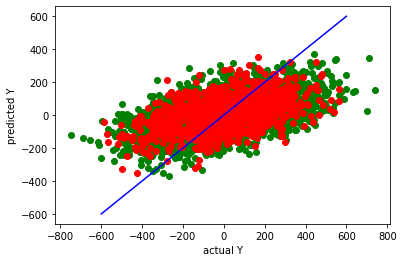

In [ ]:
plt.scatter(y_train_filter, y_pred_train_filter, color='green')
plt.scatter(y_test_filter, y_pred_test_filter, color='red')

plt.xlabel("actual Y")
plt.ylabel("predicted Y")

x = np.linspace(-600,600)
y = x
plt.plot(x, y, '-b')
plt.show

with selected features based on RFE

<function matplotlib.pyplot.show>

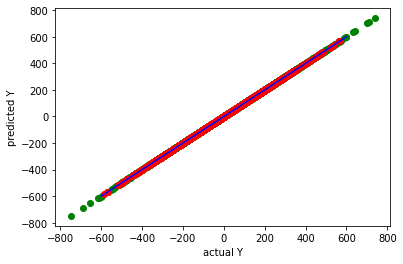

In [ ]:
plt.scatter(y_train_rfe, y_pred_train_rfe, color='green')
plt.scatter(y_test_rfe, y_pred_test_rfe, color='red')

plt.xlabel("actual Y")
plt.ylabel("predicted Y")

x = np.linspace(-600,600)
y = x
plt.plot(x, y, '-b')
plt.show

Base on the graph above, shows that the model do not overfitted witih trainning data.

# Evaluation

When only use the sum of absolute error, the error will increase parallel to count of sample data, which is not fair enough. The error should decrease as we increase our sample data as the distribution of our data becomes more and more narrower (referring to normal distribution). The more data we have, the less is the error. So, Mean Absolute Error, Mean Squared Error, and R-Squared are the choosen metrics.

**MAE (Mean Absolute Error)** <br>
This metric show the absolute difference between the target value and the value predicted by the model. The MAE is more robust to outliers and does not penalize the errors as extremely as mse. MAE is a linear score which means all the individual differences are weighted equally.<br>
\begin{equation}
\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|.
\end{equation}
**MSE (Mean Squared Error)** <br>
It is simply the average of the squared difference between the target value and the value predicted by the regression model. As it squares the differences, it penalizes even a small error which leads to over-estimation of how bad the model is. It is preferred more than other metrics because it is differentiable and hence can be optimized better.<br>
\begin{equation}
\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.
\end{equation}
**R2 (R Squared)** <br>
This metric helps us to compare our current model with a constant baseline and tells us how much our model is better. The constant baseline is chosen by taking the mean of the data and drawing a line at the mean. R² is a scale-free score that implies it doesn't matter whether the values are too large or too small, the R² will always be less than or equal to 1.<br>
\begin{equation}
R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
\end{equation}

with selected features beased on correlation score > 0.5 to Y

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MAE  : ", mean_absolute_error(y_test_filter, y_pred_test_filter))
print("MSE  : ", mean_squared_error(y_test_filter, y_pred_test_filter))
print("R2   : ", r2_score(y_test_filter, y_pred_test_filter))

MAE  :  143.13538027631964
MSE  :  31526.664491889806
R2   :  0.23168942788046631


with selected features based on RFE

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MAE  : ", mean_absolute_error(y_test_rfe, y_pred_test_rfe))
print("MSE  : ", mean_squared_error(y_test_rfe, y_pred_test_rfe))
print("R2   : ", r2_score(y_test_rfe, y_pred_test_rfe))

MAE  :  0.39966451476889303
MSE  :  0.2547693014641236
R2   :  0.9999937912255888


# Exploring Features Selection

## Only Use 1 Feature
Use X8 as the feature because it has the highest correlation value to Y

In [ ]:
selected_features = ["X8"]

Split Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data[selected_features], data[target],test_size=0.2, random_state= 1)

Model : Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Train and Test Model

In [ ]:
model.fit(x_train,y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print('Coefficients: ', model.coef_)
print('Intercept: ',model.intercept_)

Coefficients:  [[103.41891043]]
Intercept:  [11.02665639]


Visualize Model Result

<function matplotlib.pyplot.show>

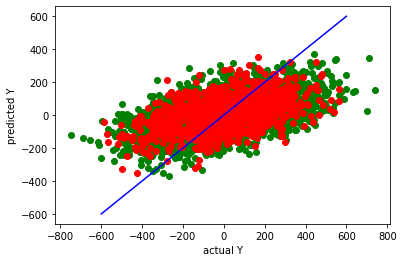

In [ ]:
plt.scatter(y_train, y_pred_train, color='green')
plt.scatter(y_test, y_pred_test, color='red')

plt.xlabel("actual Y")
plt.ylabel("predicted Y")

x = np.linspace(-600,600)
y = x
plt.plot(x, y, '-b')
plt.show

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MAE : ", mean_absolute_error(y_test, y_pred_test))
print("MSE : ", mean_squared_error(y_test, y_pred_test))
print("R2 : ", r2_score(y_test, y_pred_test))

MAE :  143.13538027631964
MSE :  31526.664491889806
R2 :  0.23168942788046631


Based on this experiment, we can see that the predictor are not performing well because of the lack of feature choosen. The target is affected with many factor from X1 to X20 (the target probably is a linear combination of X1 to X20). Only choose 1 feature cause the model can't consider another factor to predict, so the predictor run poorly.

## Use All of The Features (X1 to X20)

Choose all the features

In [ ]:
selected_features = features

Split Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data[selected_features], data[target],test_size=0.2, random_state= 1)

Model : Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Train and Test Model

In [ ]:
model.fit(x_train,y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print('Coefficients: ', model.coef_)
print('Intercept: ',model.intercept_)

Coefficients:  [[ 3.08115933e+01  6.83775976e-03 -4.70537946e-03  3.88392262e+00
  -3.15377300e-03  8.20159360e+01 -7.27900893e-03  9.73610689e+01
  -1.27121130e-04  4.29239298e+01  1.69001712e+01 -1.40649904e-02
   6.53846242e+01  8.11460075e+01  6.43050738e+01 -1.64101400e-03
  -1.90902292e-03  7.30145685e+01  1.28506477e-02  4.86389627e-03]]
Intercept:  [11.69903711]


Visualize Model Result

<function matplotlib.pyplot.show>

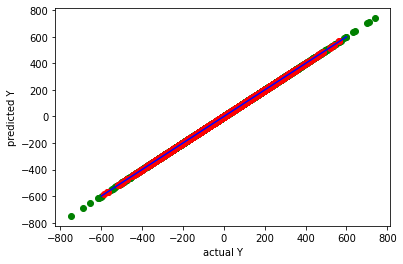

In [ ]:
plt.scatter(y_train, y_pred_train, color='green')
plt.scatter(y_test, y_pred_test, color='red')

plt.xlabel("actual Y")
plt.ylabel("predicted Y")

x = np.linspace(-600,600)
y = x
plt.plot(x, y, '-b')
plt.show

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MAE : ", mean_absolute_error(y_test, y_pred_test))
print("MSE : ", mean_squared_error(y_test, y_pred_test))
print("R2 : ", r2_score(y_test, y_pred_test))

MAE :  0.40023886138448006
MSE :  0.2554374213499504
R2 :  0.9999937749433851


Based on this experiment, we can see that the predictor are performing well as when using the best selected features based on RFE. The target is affected with many factor from X1 to X2 (the target probably is a linear combination of X1 to X20). The problem that can be arised when use all of the features is the computation cost. In this case, included all featues doesn't significantly worsen the result, but in another case it can be happend.